In [1]:
import osmnx as ox, pandas as pd, networkx as nx, time, geopandas as gpd, os, json
%matplotlib inline
ox.config(use_cache=True, log_file=True, log_console=True, log_filename='analyze_stats_every_us_city',
          data_folder='G:/Geoff/osmnx/cities-usa', cache_folder='G:/Geoff/osmnx/cache/cities-usa')

In [2]:
df = pd.read_csv('stats_every_city.csv', encoding='utf-8')
df.head()

,area,area_km,avg_neighbor_degree_avg,avg_weighted_neighbor_degree_avg,circuity_avg,city,clustering_coefficient_avg,clustering_coefficient_weighted_avg,count_intersections,degree_centrality_avg,...,self_loop_proportion,state,street_density_km,street_length_avg,street_length_total,street_segments_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,time
0,40255362.0,40.255362,2.753970,0.035323,1.073271,Abbeville,0.042936,0.002135,272.0,0.013650,...,0.015784,AL,2303.846750,198.591402,92742.184895,467.0,2.548476,"{0: 0, 1: 89, 2: 17, 3: 224, 4: 30, 5: 1}","{0: 0.0, 1: 0.24653739612188366, 2: 0.04709141...",0.361241
1,65064935.0,65.064935,2.705769,0.029835,1.099170,Adamsville,0.043897,0.001989,457.0,0.007159,...,0.001325,AL,2398.520168,194.830910,156059.558840,801.0,2.461538,"{0: 20, 1: 173, 2: 65, 3: 277, 4: 110, 5: 4, 6...","{0: 0.03076923076923077, 1: 0.2661538461538461...",0.450320
2,9753292.0,9.753292,2.760518,0.021441,1.056957,Addison,0.064725,0.005696,73.0,0.046450,...,0.008197,AL,2881.893207,228.519886,28107.945963,123.0,2.368932,"{0: 1, 1: 29, 2: 13, 3: 51, 4: 9}","{0: 0.009708737864077669, 1: 0.281553398058252...",0.139582
3,1776164.0,1.776164,3.158854,0.040816,1.069141,Akron,0.080729,0.018392,45.0,0.085317,...,0.000000,AL,5439.459943,112.341546,9661.372929,86.0,2.687500,"{0: 2, 1: 17, 2: 2, 3: 21, 4: 22}","{0: 0.03125, 1: 0.265625, 2: 0.03125, 3: 0.328...",0.061544
4,65079075.0,65.079075,2.709939,0.029232,1.094194,Alabaster,0.030139,0.001774,1176.0,0.002370,...,0.004355,AL,5341.549175,161.835698,347623.079399,2148.0,2.290150,"{0: 10, 1: 682, 2: 64, 3: 984, 4: 125, 5: 2, 6...","{0: 0.0053533190578158455, 1: 0.36509635974304...",1.566149


## Inspect the stats

In [3]:
len(df)

19655

In [4]:
df.describe()

,area,area_km,avg_neighbor_degree_avg,avg_weighted_neighbor_degree_avg,circuity_avg,clustering_coefficient_avg,clustering_coefficient_weighted_avg,count_intersections,degree_centrality_avg,edge_density_km,...,pagerank_max_node,pagerank_min,pagerank_min_node,self_loop_proportion,street_density_km,street_length_avg,street_length_total,street_segments_count,streets_per_node_avg,time
count,1.965200e+04,19652.000000,19652.000000,19652.000000,19651.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,...,1.965200e+04,19652.000000,1.965200e+04,19652.000000,19652.000000,19652.000000,1.965200e+04,19652.000000,19652.000000,19652.000000
mean,1.669483e+07,16.694829,2.938479,0.035202,1.069636,0.046818,0.009088,409.431712,0.083683,13793.015795,...,4.250646e+08,0.004642,6.892318e+08,0.005923,7116.454016,151.024412,9.578105e+04,710.781702,2.686207,0.408629
std,1.074691e+08,107.469131,0.290576,0.105326,0.158990,0.037862,0.015998,1790.915739,0.126137,7460.095674,...,8.254192e+08,0.015955,1.110777e+09,0.014456,3827.982781,76.654694,3.830531e+05,3107.839083,0.324511,1.694609
min,3.903300e+04,0.039033,0.333333,0.000487,1.000000,0.000000,0.000000,0.000000,0.000037,28.745039,...,1.473483e+06,0.000001,6.678850e+05,0.000000,14.372520,21.467703,3.000681e+01,1.000000,0.333333,0.007005
25%,1.614811e+06,1.614811,2.761290,0.026808,1.036697,0.026539,0.002309,40.000000,0.015378,8281.375453,...,1.156460e+08,0.000453,1.216605e+08,0.000000,4275.719328,112.244754,9.500552e+03,69.000000,2.487805,0.044542
50%,3.916628e+06,3.916628,2.945578,0.032225,1.058961,0.040498,0.004654,95.000000,0.045384,12766.062319,...,1.698593e+08,0.001498,1.866386e+08,0.001373,6623.023791,134.839963,2.284036e+04,163.000000,2.701410,0.093065
75%,1.157976e+07,11.579755,3.146596,0.038179,1.087214,0.057292,0.009624,274.000000,0.104610,18136.244524,...,2.236293e+08,0.004311,3.607180e+08,0.007789,9380.037784,165.368287,6.686142e+04,477.000000,2.914286,0.274815
max,7.434258e+09,7434.257623,3.704106,7.355540,20.452465,1.000000,0.524196,112026.000000,2.666667,58603.420737,...,4.474233e+09,0.500000,4.472301e+09,1.000000,29301.710368,2053.573083,1.998345e+07,191032.000000,3.598394,92.729820


In [5]:
df[['state', 'city', 'time', 'k_avg', 'n', 'm', 'circuity_avg']].sort_values(by='m', ascending=False).head()

,state,city,time,k_avg,n,m,circuity_avg
17202,TX,Houston,92.729820,4.971551,133080.0,330807.0,1.086812
3551,IL,Chicago,46.759191,5.712867,67279.0,192178.0,1.023767
1437,CA,Los Angeles,66.945949,5.572669,67849.0,189050.0,1.051462
658,AZ,Phoenix,60.200010,5.282727,63022.0,166464.0,1.082013
11855,NY,New York,42.762355,5.195516,61729.0,160357.0,1.032442


In [6]:
df.groupby('state').median().describe()

,area,area_km,avg_neighbor_degree_avg,avg_weighted_neighbor_degree_avg,circuity_avg,clustering_coefficient_avg,clustering_coefficient_weighted_avg,count_intersections,degree_centrality_avg,edge_density_km,...,pagerank_max_node,pagerank_min,pagerank_min_node,self_loop_proportion,street_density_km,street_length_avg,street_length_total,street_segments_count,streets_per_node_avg,time
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,5.100000e+01,51.000000,5.100000e+01,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000
mean,1.656681e+07,16.566810,2.919115,0.033384,1.065432,0.042006,0.004315,570.882353,0.041169,12972.598900,...,1.503447e+08,0.001466,1.776184e+08,0.003292,6749.326170,137.183726,1.124350e+05,979.284314,2.688296,0.568070
std,2.990084e+07,29.900844,0.144988,0.004924,0.015431,0.005594,0.001656,2227.166791,0.027858,4873.168375,...,8.238757e+07,0.001114,1.172313e+08,0.003689,2616.292164,23.999109,3.591321e+05,3802.976586,0.172296,2.137039
min,1.070451e+06,1.070451,2.664660,0.025077,1.041495,0.026773,0.001492,29.000000,0.000317,1075.006925,...,3.886346e+07,0.000009,4.039192e+07,0.000000,537.503462,93.642581,9.909856e+03,52.000000,2.309402,0.041543
25%,2.778780e+06,2.778780,2.808598,0.029507,1.052805,0.038232,0.003242,73.000000,0.024270,9229.777305,...,1.032498e+08,0.000777,1.092979e+08,0.000000,4823.855515,119.963408,1.757072e+04,131.500000,2.571312,0.081182
50%,5.069211e+06,5.069211,2.910626,0.033331,1.063054,0.040951,0.004537,105.500000,0.038703,12682.349229,...,1.466391e+08,0.001312,1.605062e+08,0.002546,6689.273482,132.859773,2.705676e+04,177.000000,2.678571,0.101572
75%,1.219045e+07,12.190452,2.996298,0.036321,1.076959,0.045024,0.005295,166.250000,0.053505,15831.629865,...,1.861217e+08,0.001818,2.023857e+08,0.004591,8217.263281,156.046509,4.291645e+04,294.500000,2.775041,0.168370
max,1.583650e+08,158.364992,3.227203,0.049792,1.106981,0.055603,0.008551,15888.000000,0.111373,28144.917385,...,5.817516e+08,0.004527,6.395682e+08,0.017579,16042.202172,192.616257,2.540523e+06,27130.000000,3.093771,15.217800


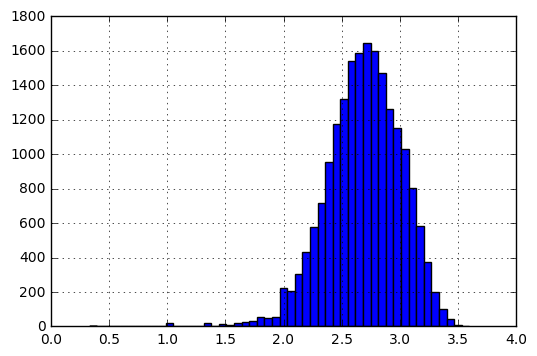

In [7]:
df['streets_per_node_avg'].hist(bins=50)

In [8]:
df.groupby('state')['streets_per_node_avg'].median().sort_values()

state
HI    2.309402
AK    2.387097
VT    2.419355
AL    2.469565
NC    2.488542
KY    2.488889
VA    2.489468
WV    2.496154
DE    2.535433
TN    2.538421
NY    2.554054
MD    2.560386
AR    2.568353
UT    2.574271
OR    2.587111
GA    2.591549
MS    2.603279
ME    2.616454
LA    2.622530
SC    2.629569
CT    2.631966
NH    2.635092
CA    2.651991
WI    2.668797
MO    2.677655
WA    2.678571
OH    2.691608
AZ    2.692308
MA    2.698427
NV    2.715416
MN    2.722892
FL    2.729401
PA    2.729730
NJ    2.742857
ID    2.743590
MI    2.752688
CO    2.761905
TX    2.771695
IL    2.778387
NM    2.803843
RI    2.816610
IN    2.818182
WY    2.840407
OK    2.849558
IA    2.896552
ND    2.948454
SD    2.962963
KS    3.014563
NE    3.018868
MT    3.034483
DC    3.093771
Name: streets_per_node_avg, dtype: float64

In [9]:
# node and edge density per km are hard to interpret when using municipal boundaries
# as municipal boundaries vary greatly in their extents around the built-up area
df.groupby('state')['node_density_km'].median().sort_values()

state
AK      2.238862
ME     11.759212
AL     13.209475
UT     18.241814
AZ     19.034411
MS     19.071173
TN     19.265750
NV     19.281343
HI     19.307686
NH     20.086754
GA     20.573242
AR     20.951934
LA     22.665063
SC     24.696610
NC     27.783840
MN     27.936813
WI     27.966365
VT     30.298005
NY     30.732309
TX     30.821540
NM     31.242761
MI     31.567320
IA     33.098896
WY     34.202199
KY     35.104209
OK     36.321311
FL     37.116508
CT     38.134840
IL     39.114528
DE     39.214917
SD     39.294103
VA     40.070010
OH     41.406133
MO     41.838048
WV     46.923502
CO     47.137550
MA     48.902673
ND     49.011267
ID     49.286126
IN     49.506064
WA     50.583782
CA     52.308762
PA     55.593289
NJ     58.669475
OR     59.399616
KS     60.518450
MD     60.956774
MT     72.249397
NE     74.624614
RI     75.084693
DC    110.302156
Name: node_density_km, dtype: float64

In [10]:
df[df['state']=='AZ'][['node_density_km', 'city']].sort_values(by='node_density_km')

,node_density_km,city
631,2.069506,Gila Bend
677,2.777417,Star Valley
687,3.369681,Wellton
680,3.676294,Taylor
686,3.787022,Tusayan
690,4.052267,Williams
626,4.086896,Eloy
608,4.351547,Buckeye
615,4.508591,Chino Valley
667,4.843427,St. Johns
